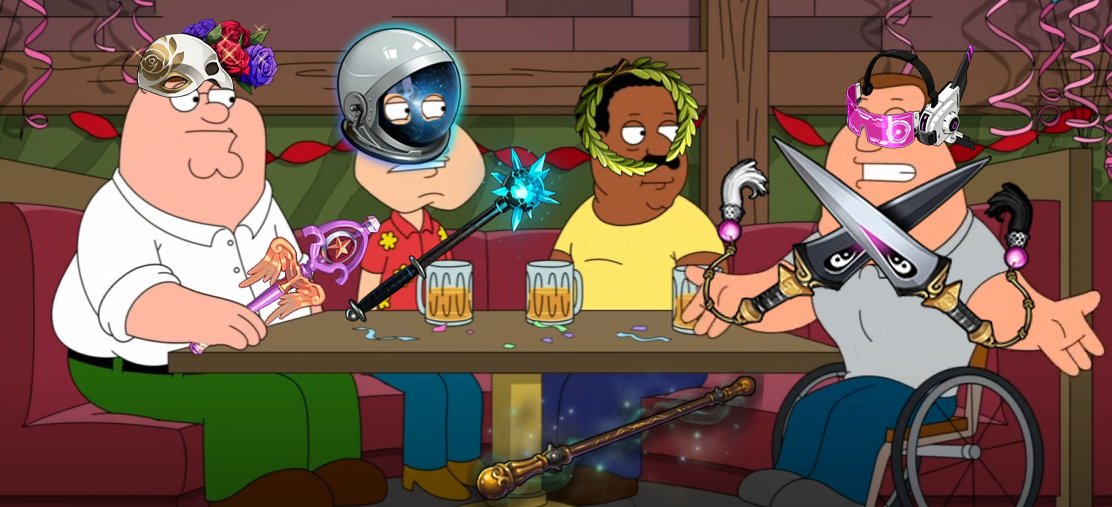

# Pacotes e Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

In [2]:

arquetipos_level = pd.read_csv("arquetipos_level.csv").drop(columns=["Unnamed: 0"])
df = pd.read_csv("df.csv").drop(columns=["Unnamed: 0"])

In [3]:
arquetipos_level.head()

,archetype,hpBase,hp6,hp10,hp15,hpMax,defenseBase,defense6,defense10,defense15,defenseMax,attackBase,attack6,attack10,attack15,attackMax
0,Warrior,972.52,1424.32,1785.76,2237.56,2689.42,52.42,68.42,81.22,97.22,113.17,35.33,57.83,75.83,98.33,120.78
1,Mage,925.27,1316.42,1629.34,2020.49,2411.65,52.38,65.98,76.86,90.46,104.12,35.92,56.87,73.63,94.58,115.50
2,Tanker,973.00,1425.00,1786.60,2238.60,2690.60,51.10,67.00,79.72,95.62,111.52,36.80,58.70,76.22,98.12,120.02
3,Marksman,915.67,1299.32,1606.24,1989.89,2373.60,50.73,64.23,75.03,88.53,102.03,34.20,55.35,72.27,93.42,114.51
4,Assasin,946.67,1393.32,1750.64,2197.29,2644.00,51.33,66.33,78.33,93.33,108.33,31.00,54.15,72.67,95.82,119.03


# Intuito desse estudo

* **Guia Prático: Como Não Perder para o Loadout (Ou Pelo Menos Tentar)**

Depois de uma pausa no jogo (umas 3 seasons), voltei para encontrar o *caos absoluto* nas filas de elo baixo (SA e NA). Mesmo com high elo tentando ensinar, notei três verdades dolorosas:  

1. **Até os melhores perdem pro Loadout** (é a realidade, não tem como fugir).  
2. **Os "GOATs" que vencem fazem por instinto** (e explicar isso pra um novato é tipo ensinar física quântica com mímicas).  
3. **Eu tive tempo livre** (e aqui estamos).  


# Dados

Os dados foram tirados direto da **API** *, que você pode encontrar em seu [site oficial](https://playeternalreturn.com/) na aba *Community*.

- Os dados foram retirados da **API** no dia `15/04/2025`
- Eu só fui começar a escrever esse guia no dia `24/04/2025`

Por mais que tenha *patch note* entre as datas, não ocorreu nenhuma mudança que vá mudar os calculos. você conhece a Nimble possivelmente tiraram 5 de dano do **Shoichi**, botaram 2 de defesa no **Yuki** e buffaram todos os Amps do jogo.

# <a name="#status"></a> Status

## <a name="defesa"></a> Defesa

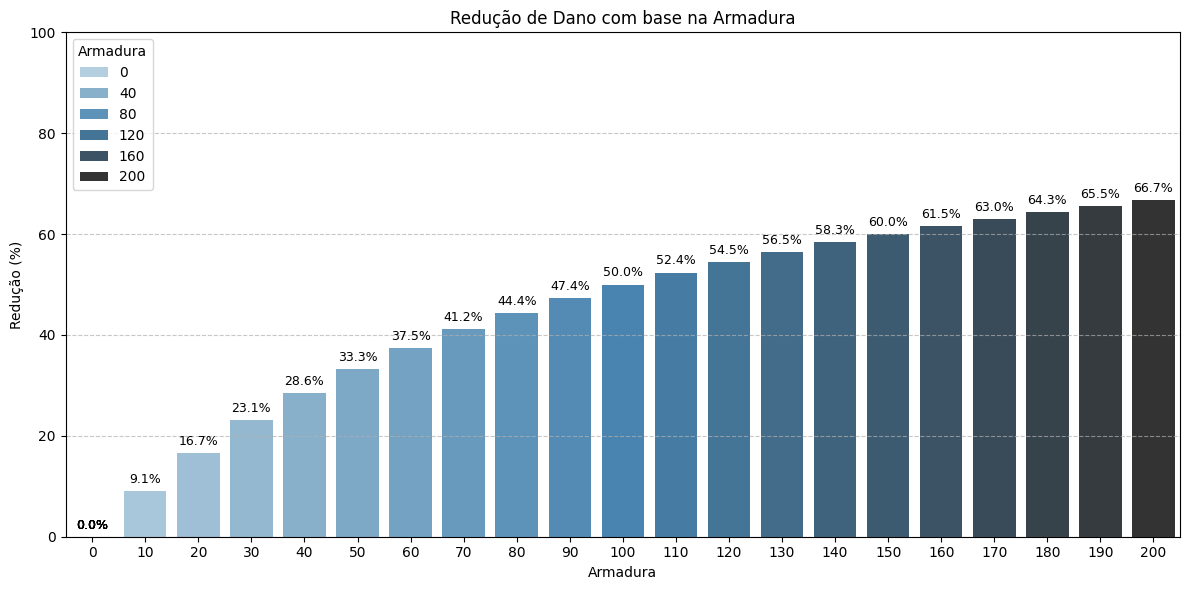

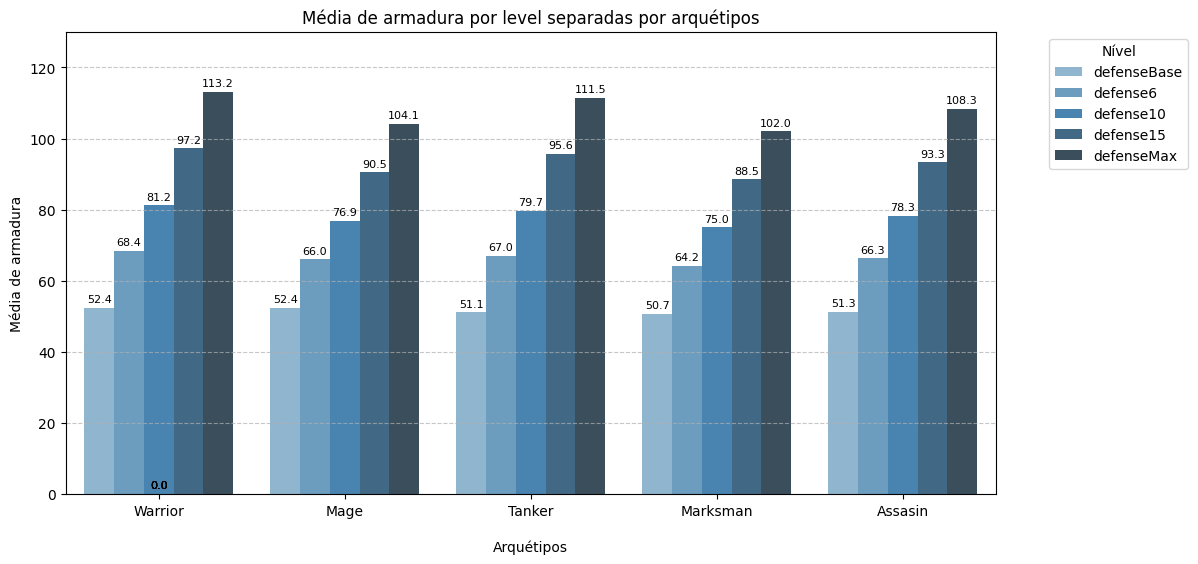

In [4]:
# Plotar como barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Armadura", y="Reducao", data=df, hue='Armadura', palette="Blues_d")

# Adicionar os valores no topo das colunas
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        x=bar.get_x() + bar.get_width() / 2,  # Posição horizontal centralizada na barra
        y=height + 1,                         # Posição vertical ligeiramente acima da barra
        s=f'{height:.1f}%',                   # Texto formatado com uma casa decimal
        ha='center',                          # Alinhamento horizontal centralizado
        va='bottom',                           # Alinhamento vertical na base do texto
        fontsize=9,
        color='black'
    )

plt.title("Redução de Dano com base na Armadura")
plt.xlabel("Armadura")
plt.ylabel("Redução (%)")
plt.ylim(0, 100)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## -----------------

# Reformata os dados para ter uma coluna "level" e outra "defense"
df_melted = pd.melt(
    arquetipos_level,
    id_vars=["archetype"],
    value_vars=["defenseBase", "defense6", "defense10", "defense15", "defenseMax"],
    var_name="level",
    value_name="defense"
)

# Cria o gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x="archetype",
    y="defense",
    hue="level",
    data=df_melted,
    palette="Blues_d"
)

# Adiciona os valores nas barras
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        x=bar.get_x() + bar.get_width() / 2,
        y=height + 1,
        s=f'{height:.1f}',
        ha='center',
        va='bottom',
        fontsize=8,
        color='black'
    )

plt.title("Média de armadura por level separadas por arquétipos")
plt.xlabel("\nArquétipos")
plt.ylabel("Média de armadura")
plt.ylim(0, 130)
plt.legend(title="Nível", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

### Mas porque Tanker tem menos defesa média que os Lutadores?

*  **A Sábia Decisão da Nimble**  
Enquanto itens de **tank** dão **Defesa + HP** (o pacote completo), itens de **lutador** te obrigam a escolher entre um deles (na maioria dos casos) 

*Sim, é um sistema que até faz sentido - quem diria?*  



* **Vantagens dos Tanks (Que Não Incluem "Socar Carry Até a Morte")**  
1. **Kits Defensivos Natos:**  
   - Escalas com **HP/Defesa** nas habilidades  
   - Controle em área (*porque segurar 3 pessoas no stun é "balanceado"*)  
   - Sobrevivência extra (*curiosamente, o que um tank deveria fazer*)  <br><br>


2. **"~~Ainda~~ Não É League of Legends"**  
   - Aqui, tanks **tankam** (revolucionário, não?).  
   - Sem solos absurdos, *Pelo menos por enquanto...*  <br><br>


* **Conclusão**  
A Nimble acertou em:  
    - **Tanks são tanks** (não carries disfarçados)  
    - **Lutadores precisam escolher** entre tankar ou dar dano  
    - **Ninguém vira um raid boss** só porque buildou resistência  

*Mas fiquemos de olho. Nunca se sabe quando um patch vai estragar tudo...*  

### *Mas então, vale a pena ter defesa na build?*  

#### **Resposta curta:** **SIM, OBVIAMENTE. (mas depende)**  

* *Para os iluminados que jogam de AMP:*  
    - Ter **+20 de armadura** *(Nenhuma armadura com AMP possui menos de 20 de defesa, vida fácil)* faz sua defesa pular de **64** (39% de mitigação) para **84** (46% de mitigação) no *level 6*.  
    - **Bônus secreto:** Você não morre em 0.2 segundos para assassinos como **Daniel** ou **Aiden** no early game. *Uau, que novidade.*  
 <br><br>
#### *Cenário triste (mas real):*  

Você é um *Atirador/Mago* com **65** de Defesa no *level 6*. Surge um **Daniel** com **34 de penetração de armadura**. Sua defesa despenca para **31**, e sua mitigação vai de **39%** para **24%**. Tradução: você toma **26% a mais de dano**. *Surpresa? Nem um pouco.*  

*"Ah, mas AMP é quebrado!"* – sim, e você provavelmente tem habilidades defensivas. Mas a vida não é um morango, e às vezes você ainda vai morrer.  

#### Para os *"espertinhos"* de Attack Power:  
* Seus itens ofensivos dão entre **0** (*Butler Suit*) e **17** (*Dobbok*) de defesa. *Spoiler:* isso é **péssimo**.  

#### *Mas há esperança!* (quase nenhuma)

 
- **Braço:** Itens com **5** (crítico - *Minuteman Armband*) ou **10** (atk speed - *Plasma Arc*) de defesa.  
- **Cabeça:** *Wielding Helmet* (atk speed + **10** de defesa).  
- **Resultado:** Sua defesa sobe para **±52**, com **34% de mitigação** – *10% a mais* do que se você fosse um *yolo player* full ofensivo.  
#### *Dica "revolucionária":*  
No early game, use itens defensivos. Depois, no *level 11* (quando sua defesa já está em **±82** com 45% de mitigação), você pode trocar por itens ofensivos. *Genial, não?*  


 <br><br>
#### *Observações óbvias (que alguém precisava dizer):*  
1. Ninguém faz build **SOMENTE** com penetração de armadura. *Isso foi um exercício hipotético, não um tutorial.*  
2. Na realidade, assassinos terão **16 a 24** de penetração (3 itens).  
3. *O valor máximo de armor pen sem micar itens é **34** (com *Rocker's Jacket, Plasma Helmet, Shah Jahan, Glacier* – e sem contar armas).*  

**Conclusão:** Defesa é útil. *Quem diria, hein?*  

### Não entendi porque 26% a mais de dano??? (segundo paragráfo)

**Mitigação de dano (%)** = (Defesa) / (Defesa + 100)

- **65 defesa** → 65 / (65 + 100) ≈ 39,39% de redução.
- **31 defesa (após penetração)** → 31 / (31 + 100) ≈ 23,66% de redução.

**Dano efetivo recebido** = 100% - Mitigação

- **Antes**: 100% - 39,39% = 60,61% do dano original.
- **Depois**: 100% - 23,66% = 76,34% do dano original.

**Aumento relativo de dano** = (Novo dano / Dano anterior) - 1

(76,34% / 60,61%) - 1 ≈ 0,2599 (ou ~26% mais dano).

### Bem, então compensa fazer defesa no começo mas e no meio para o final do jogo? (lv 11+)

*No early game*, vimos que um assassino full *tryhard* pode ter **34 de armor pen**. Mas e se ele estiver *realmente* comprometido com o ódio e micrar tudo pra penetração?  

#### *O pesadelo do late game:*
- **56 de armor pen** (com *Tactical Armor, Twilight, Chain of Thorns, Iron Maiden* – sem contar armas, porque o cara já tá *sadico* o suficiente).  
- **Catch?** Isso só rola lá pro *level 15* (a menos que o time dele seja um *saco de presentes* e dobre todos os itens pra ele – nesse caso, recomendo que coloque uma músiquinha boa e abra outro jogo).  

#### *E você, pobre coitado, como fica?*
- Sua defesa *bruta* estará em **±89**.  
- Itens micrados *(Armaduras)* dão no mínimo **15 de defesa** (ou **23** se você for *AMP*, porque o jogo claramente ama vocês).  
- Isso te joga pra **±105 de defesa** (**51% de mitigação**).  

#### *O resultado inevitável:*
- O assassino reduz sua defesa pra **49** com **33% de mitigação**.  
- **Tradução:** Você *ainda* toma um **balde de dano**, mas:  
  1. Você tem **o dobro da vida** do early game.  
  2. *Teoricamente*, seu time existe (eu espero).  
  3. Neutralizar a ameaça > tankar indefinidamente.  

#### *Veredito final:*
- **Defesa ainda importa**, mas *dano* e *posicionamento* viram prioridade. Afinal, morto não dá DPS. *Surpreso?*  

## <a name="armorpen"></a> Penetração de Armadura

#### *"Ah, mas no early game eu clico muito!" - Todo assassino antes do lv 11*

Você já sabe: **armor pen domina o começo**, mas decai no decorrer da partida, vamos a alguns cenários:



#### **Cenário 1: O All-In Desesperado (Build Full Penetração)**
- **Early game:** Você é o *terror dos magos/atiradores*, muito dano como vimos antes.  
- **Mid/late game:**  
  - *Opção 1:* Rouba todos os itens de **RNG** do time, micra tudo pra pen e crie um efeito bola de neve (e torce pra não ser xingado).  
  - *Opção 2:* Não micre tudo, perca relevância e vire um *peso morto*.  <br><br>
- **Verdade inconveniente:** Se não dominar o jogo até o lv 11, *melhor migrar para Attack Power* utilize de itens como: *Halo* ou *Cube Watch* que causam bastante dano sem precisar de muito e cabem em quase toda build. 



#### **Cenário 2: "Só um Pedacinho" (1-2 Itens de Penetração)**
* *Típico de **Aiden** ou **Luke** que ficam em cima do muro.*

* Para builds que começam com poucos itens de penetração e podem tanto ir para builds assassinas quanto lutadoras.  

#### *Decisão crítica:*
1. **Conseguiu os itens de RNG no Dia 2?**  
   - *Sim:* Vira o *snowball*, esmaga o early e reza pra acabar rápido.  
   - *Não:* *Micra pra lutador* - é mais eficiente e não vai te deixar *tristasso* no late.  <br><br>

2. **Regra de ouro:**  
   - 1-2 itens de pen no early = *spike forte*.  
   - 1-2 itens de pen no late = **+6% de dano** (em alvos com 100 def). *Parabéns, você fez 400 créditos valer menos que um augment secundário (stopping Power: 6% armor pen)*  



#### *Itens que Valem Menção (Ou Não)*

* **Tactical Armor**  
- *"Mas da pouco Ataque"* - Surpresa! é o segundo item ofensivo com maior defesa  
  - Executar o inimigo com 7% da vida faz esse item ser o único item de penetração que vale a pena ter caso você não esteja com uma build focada em  penetração  
  - *Bônus:* Não precisa de 30 pen pra ativar. *Finalmente uma W da Nimble.*  

* **Dragon Scale (O queridinho dos AMP)**  
- *Único item de pen em % do jogo* (e só AMP pode usar, porque *balanceamento*).  
- **Problema:**  
  - *Inútil antes do lv 10* (só vale realemente a pena contra inimigos com 100 ou mais de defesa).  
  - *Por que rushar?* não, é melhor fazer seu **Persona** antes ou alguma outra coisa  



#### *Dicas Finais (Para Não Ser um Peso no Time)*  
1. **Early game:** 1-2 itens de pen = *pressão garantida*.  
2. **Mid game:** Se não virou *snowball*, *vaza da build*.  
3. **Late game:** Ou foca totalmente em penetração ou vai ser como um *copo d'água em incêndio*.  
4. **Dragon Scale:** Só compre se:  
   - Você é AMP.  
   - O inimigo tem +100 def.  
   - Você *gosta de sofrer*.
   - Ja fez os itens mais importantes  

*(Ou seja, quase nunca.)*  


**Conclusão:** Penetração é *como bebida em festa* - ótima no começo, mas se exagerar, você acaba *no chão e arrependido*. 

## <a name="vida "></a>Vida

### Escolhendo Entre Vida e Defesa: A Arte da Sobrevivência Estratégica

#### *"Quer tankar? A Nimble te obriga a tankar direito."*

Aqui está a *lei não escrita* dos itens defensivos:



#### **Por Que Defesa no Early e Vida no Late?**
- **Sistema da Nimble:**  
  - Itens defensivos = possuem sempre **vida + defesa** (juntos, como um *casamento ruim* que você não pode divorciar).  
  - Itens ofensivos = possuem apenas **vida, ou defesa** (e nunca os dois). *Porque sofrer é opcional, mas limitado.*   <br><br>

- **Resultado:**  
  - **Early game:** Defesa é a prioridade (mitigação > HP bruto).  
  - **Late game:** Vida escala melhor (já que % de mitigação *não cresce infinitamente*).  

*(Tradução: Se você buildar só dano, vai morrer igual barata no começo. Parabéns, você caiu no esquema da Nimble.)*



#### **A Única Pergunta Que Importa**  
* *"Devo pegar defesa ou vida no meu item inicial ofensivo?"*  

#### **Regra Infalível:**  
* **Vai micrar ele cedo?**  
   - **Sim** → Pegue **defesa**. *(Early game = mitigação vai te salvar dos malucos do **SA**)*  
   - **Não** → Pegue **vida**. *(Late game = HP bruto compensa mais.)*  <br><br>


# Dúvidas frequentes (itens e augments)

## Itens

### Tactical Visior ou Laurel Wreath

Todos que jogam de lutador em algum momento já se viram na situação: Tenho 1 arvore da vida e ainda não micrei o capacete e preciso de *redução de tempo de recarga*, será que compensa mais fazer **Tactical** ou **Laurel**?

vamos conferir os status:

|Status|Tactical Visior|Laurel Wreath|
|:--:|:--:|:-:|
|CD reduction| 15% | 15% |
|Max HP | 200 | 0 |
|Atk speed | 42% | 0 |
|Atk power | 0 | 37 |
|Armor pen | 0 | 11 |

* Temos aqui que Laurel parece mais ofensivo, possuindo 37 de Attack Power e 11 de penetração de armadura, contudo, Tactical Visior causa 3.5% da vida inimiga + 30 de dano a cada 2 ataques básicos. 

* Vamos criar uma situação hipotética
    1. você possui: 200 ataque (sem o capacete)
    2. o inimigo possui 1700 (base para o level 10) de vida e 100 de defesa (50% de mitigação) 
    3. você vai dar 4 ataques consecutivos. <br><br>

(Obs: mitigação sem armor pen: 50% | mitigação com 11 de armor pen: 47%)  
(Dano do electrick shock: (3.5% de 1500) + 30 = 52.5 + 30 = 82)

|Tipo de dano|Tactical Visior|Laurel Wreath|
|:--:|:--:|:-:|
|Dano bruto (sem mitigação) | 800 | 948 |
|Dano com mitigação | 400 | 474 |
|Dano com mitigação + Armor pen | 400 | 502 |
|Dano com mitigação + Armor pen + Electric Shock  | 482  | 502 |


com isso você percebe que o dano é muitíssimo similar mesmo não tendo nenhum *status ofensivo* além de *atk speed* no **Tactical Visior**

o que nos leva a algumas conclusões:

* Quando buildar **Laurel**
  1. Build focada inteiramente em penetração de armadura (11 de penetração é pouco, mas em conjunto com outros itens pode ser fortíssimo)
  2. Seu personagem não consegue atacar diretamente com frequencia
  3. Você é um "mago" de Atk power e possuindo um escalamento muito bom Atk Power, fazendo com que esses *+37* sejam muito bem utilizados
<br><br>
* Quando buildar **Tactical**
    1. Quando você consegue dar ataques durante a luta ou seu boneco é interamente focado nisso.
    2. Lutadores e personagens com escalamento em vida, esses +200 de hp vão fazer diferença, pode confiar.
    3. Casos raros em que o time inimigo é baseado em escudo ou um deles possui o **Augment: Sentinel**
    4. Quando você precisar de atk speed até porque 42% é bem respeitável.
  

## Augments

### Stopping Power X Open Wounds

Aqui vemos 2 runas ofensivas secundárias. vamos as descrições: 

* **Stopping Power**: Causar dano em algum inimigo lhe concede `6% de penetração de armadura` por 4 segundos. Tempo de recarga: 11 segundos
* **Open Wounds**: Causa `10 + (Level * 2) + (8% hp atual do inimigo)` como dano de habilidade por 2 segundos. Tempo de recarga: 11 segundos
<br><br>


* **Stopping Power**  
*(pp = pontos percentuais)*
| Level | Defesa Base | Mitigação | Mitigação (pós 6% pen) |
|-------|------------|-----------|-------------------------|
| 6     | 85         | 46%       | 44% (-2pp)              |
| 10    | 95         | 49%       | 47% (-2pp)              |
| 15    | 109        | 52%       | 51% (-1pp)              |
| 20    | 130        | 57%       | 55% (-2pp)              |


* **Open Wounds**  
**Fórmula:** `10 + (Level × 2) + (8% HP atual do inimigo)`  
*(Valores já considerando 50% de mitigação ou seja 100 de defesa)*   

| Level | Inimigo 500HP | Inimigo 1000HP | Inimigo 1500HP |
|-------|--------------|---------------|---------------|
| 6     | 10+12+40 = **62** | 10+12+80 = **102** | 10+12+120 = **142** |
| 10    | 10+20+40 = **70** | 10+20+80 = **110** | 10+20+120 = **150** |
| 15    | 10+30+40 = **80** | 10+30+80 = **120** | 10+30+120 = **160** |
| 20    | 10+40+40 = **90** | 10+40+80 = **130** | 10+40+120 = **170** |


* Resultado final: Não importa como você pense **Open Wounds** sempre será superior.

### Frailty Infliction

* **Descrição do Efeito**
Ao acertar um inimigo com **3 ataques básicos** ou **3 habilidades separadas** em 5 segundos:
1. Causa `30 + (level × 3)` de dano verdadeiro
2. Reduz a defesa do alvo em `7 + (level / 2)%` por 6 segundos


* **Breakdown dos Valores**

| Level | Dano Verdadeiro | Redução de Defesa |
|:-----:|:---------------:|:-----------------:|
| 6     | 48              | 10%               |
| 15    | 75              | 14.5%             |



* **Impacto Prático**
**No level 6:**
    - **Dano:** 48 é relevante no early
    - **Redução:** 
      - Alvo com 85 def → 76 def  
      - Mitigação cai de ~46% para ~43% (diferença de 3%) <br><br>

* **No level 15:**
    - **Dano:** 75 é basicamente insignificante, mas melhor que nada
    - **Redução:**
      - Alvo com 108 def → 94 def  
      - Mitigação cai de ~52% para ~48% (diferença de 4%) <br><br>



* **Pontos-Chave**
1. **Vantagens:**
   - Redução afeta **todos os danos do time**
   - Escala contra tanques (útil late game)
   - Aplica-se **antes** da penetração fixa, fazendo sua build de penetração ainda mais forte <br><br>

2. **Limitações:**
   - Efeito individual fraco
   - Dano verdadeiro não escala bem
   - Pouco impacto contra alvos com baixa defesa caso você não tenha uma buil de penetração

# Fórmulas

### Mitigação de dano por defesa

A fórmula para mitigação de dano para cada ponto de defesa é de:

*Redução (%)* = $\frac{Defesa}{Defesa + 100} \times 100$

*(Arredondando para cima, sempre.)*

Mas como cheguei nisso?

1. Realização dos testes

* Foi utilizado um Aiden lv 3 com os seguintes itens:


1.   Arma: Arcane Edge
2.   Peito: *Nenhum*
3.   Cabeça: Welding Helmet
4. Braço: Minuteman Armband
5. Perna: Maverick Runner


* Aiden nessas devidas circunstancias causa exatos 200 de dano em seu **Q** na forma **corpo-a-corpo**
* Foi realizado o golpe, visto o dano no boneco alvo e logo após feito uma regra de 3 para descobrir a porcentagem que foi reduzida pela armadura.
* O Golpe foi realizado 21x, cada vez aumentando a armadura do boneco em 10, começando do 0 e indo até 200.  

*data do teste: 18/07/2024 - (DD/MM/YYYY)*

2. Conferindo os resultados percebi muita semelhança com **LoL**, ao pesquisar a fórmula percebi que de fato, era a mesma.

### Como funciona o calculo ao receber dano

* Ordem de aplicação de quebra de armadura.
1. Helix
2. Debilitation Fog
3. *(frailty)*
4. Armor pen %
5. Armor pen flat
6. A armadura não pode ser reduzida abaixo de 0, diferente de jogos como *League of Legends* <br><br>

* Exemplo: 100 de armadura, 15% de penetração e 15 de penetração flat 

1. Helix é aplicado (5 stacks) tirando 20 de defesa, sobrando 80 de defesa
2. Debilitation fog (Bride) é aplicado, tirando 12% dos 80 e não da armadura total resultando em 70 de defesa
3. *(Aqui entraria a frailty, caso alguem do seu time tenha)*
4. A penetração em % é aplicada, reduzindo de 70 para 59,5 (que sera arredondado para cima, pelos meios da Nimble) totalizando 60
5. A penetração flat é aplicada, reduzindo de 60 para 45. <br><br>

* Resultado
    - 100 de defesa (sem os efeitos): 50% de mitigação
    - 45 de defesa (já com os efeitos): 30% de mitigação <br><br>


* Todo efeito que não cause dano verdadeiro (Smolder) tem seu dano reduzido pela defesa (se beneficia da penetração de armadura do usuario)

* A aplicação de Helix ou Debilitation Fog (Bride) reduz a armadura do alvo, fazendo com que o mesmo receba mais dano de todos as outras fontes 

# FAQ

| Pergunta               | Resposta                                                                 |
|------------------------|--------------------------------------------------------------------------|
| **Quem sou eu?**       | Prazer, meu nome é Pedro porém sou mais conhecido como *Adevo* no meio do Eternal Return |
| **Tempo de jogo?**     | Não costumo jogar tanto, raramente passo de 200 partidas ranqueadas mas jogo desde a terceira temporada da Solo. |
| **Personagem favorito?** | Yuki.                                                                  |
| **Servidor?**          | South America.                                                          |
| **Data do estudo?**    | 24/04/2025 - (DD/MM/YYYY)                                              |